In [1]:
import evaluation as ev
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
import mplhep
plt.style.use(mplhep.style.ROOT)


In [2]:
reload(ev)

<module 'evaluation' from '/Users/klijnsma/work/hgcal-training/hgcal_training_scripts/evaluation.py'>

In [2]:
def get_stats(tbeta=.2, td=.5, nmax=4):
    stats = ev.Stats()
    all_matches = []
    yielder = ev.TestYielder()
    for event, _, clustering, matches in yielder.iter_matches(tbeta, td, nmax):
        stats.extend(ev.statistics_per_match(event, clustering, matches))
        all_matches.extend(matches)
        stats.add('confmat', ev.signal_to_noise_confusion_matrix(event, clustering, norm=True))
    return stats, all_matches

In [3]:
stats, matches = get_stats(nmax=1000)

100%|██████████| 1000/1000 [05:44<00:00,  2.90it/s]


In [4]:
def cmslabel(ax, text=r'$\itSimulation \; Preliminary$', x=.12, y=.88, dx=.12):
    ax.text(
        x, y, r'$\bfCMS$',
        ha='left', va='bottom',
        transform=ax.figure.transFigure,
        fontsize=36
        )
    ax.text(
        x+dx, y, text,
        ha='left', va='bottom',
        transform=ax.figure.transFigure,
        fontsize=28
        )


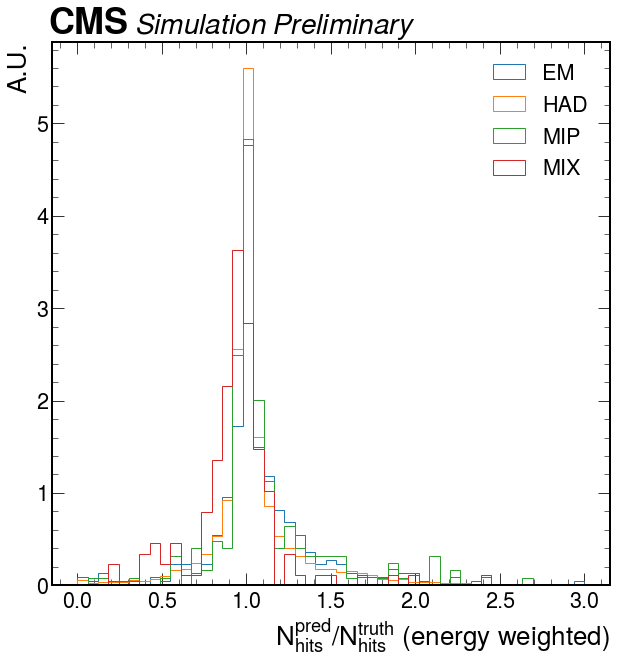

In [9]:
fig = plt.Figure(facecolor='white')
ax = fig.gca()
cat_name = {0: 'EM', 1: 'HAD', 2: 'MIP', 3: 'MIX'}

# ax.set_xlabel(r'$\Sigma E_{hit}^{pred} / \Sigma E_{hit}^{truth}$')
ax.set_xlabel(r'$N_{hits}^{pred} / N_{hits}^{truth}$ (energy weighted)')
ax.set_ylabel('A.U.')

bins = np.linspace(0., 3., 50)

for cat in range(4):
    sel = stats['category'] == cat
    epred_o_etruth = stats['esum_pred'][sel] / stats['esum_truth'][sel]
    ax.hist(epred_o_etruth, label=cat_name[cat], bins=bins, density=True, histtype=u'step')

ax.legend()
cmslabel(ax)

fig


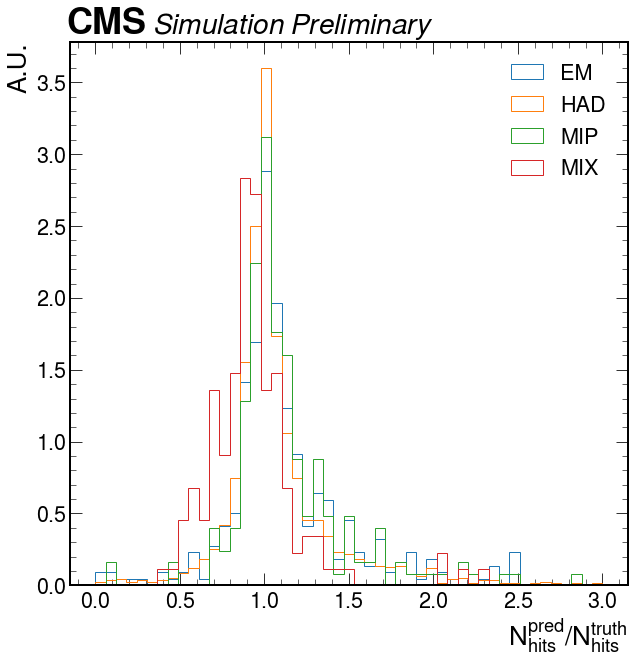

In [6]:
fig = plt.Figure(facecolor='white')
ax = fig.gca()

cat_name = {0: 'EM', 1: 'HAD', 2: 'MIP', 3: 'MIX'}

ax.set_xlabel(r'$N_{hits}^{pred} / N_{hits}^{truth}$')
ax.set_ylabel('A.U.')

bins = np.linspace(0., 3., 50)

for cat in range(4):
    sel = stats['category'] == cat
    nhitspred_o_nhitstruth = stats['nhits_pred'][sel] / stats['nhits_truth'][sel]
    ax.hist(nhitspred_o_nhitstruth, label=cat_name[cat], bins=bins, density=True, histtype=u'step')

cmslabel(ax)
ax.legend()
fig


In [7]:
fig.savefig('test.pdf')

# EM only

In [40]:
def get_stats_em(tbeta=.2, td=.5, nmax=1000):
    stats = ev.Stats()
    all_matches = []
    yielder = ev.TestYielderEM()
    for event, _, clustering, matches in yielder.iter_matches(tbeta, td, nmax):
        stats.extend(ev.statistics_per_match(event, clustering, matches))
        all_matches.extend(matches)
        stats.add('confmat', ev.signal_to_noise_confusion_matrix(event, clustering, norm=True))
    return stats, all_matches

em_stats, em_matches = get_stats_em()

100%|██████████| 1000/1000 [05:06<00:00,  3.27it/s]


In [46]:
for (truth_ids, pred_ids), cat in zip(em_matches, em_stats['category']):
    print(f'{cat=}, {truth_ids=}')


cat=0, truth_ids=[11]
cat=1, truth_ids=[8]
cat=1, truth_ids=[1]
cat=1, truth_ids=[4]
cat=1, truth_ids=[10]
cat=1, truth_ids=[2]
cat=1, truth_ids=[5]
cat=1, truth_ids=[6]
cat=1, truth_ids=[3]
cat=1, truth_ids=[4]
cat=1, truth_ids=[5]
cat=1, truth_ids=[3]
cat=1, truth_ids=[2]
cat=1, truth_ids=[1]
cat=1, truth_ids=[2]
cat=1, truth_ids=[1]
cat=1, truth_ids=[2, 3]
cat=1, truth_ids=[4]
cat=1, truth_ids=[1]
cat=1, truth_ids=[5]
cat=1, truth_ids=[2]
cat=1, truth_ids=[4]
cat=1, truth_ids=[3]
cat=1, truth_ids=[6]
cat=1, truth_ids=[2]
cat=1, truth_ids=[5]
cat=1, truth_ids=[1]
cat=1, truth_ids=[7]
cat=1, truth_ids=[2]
cat=1, truth_ids=[1]
cat=1, truth_ids=[2]
cat=1, truth_ids=[3]
cat=1, truth_ids=[1]
cat=1, truth_ids=[3]
cat=1, truth_ids=[1]
cat=1, truth_ids=[1, 2]
cat=1, truth_ids=[8]
cat=1, truth_ids=[7]
cat=1, truth_ids=[1]
cat=1, truth_ids=[8, 9]
cat=1, truth_ids=[7, 4, 5, 3, 6]
cat=1, truth_ids=[1, 2]
cat=1, truth_ids=[4]
cat=1, truth_ids=[1]
cat=1, truth_ids=[3]
cat=1, truth_ids=[2]
cat=1, t